In [2]:
import cv2

In [3]:
img=cv2.imread('img2_women.jpg')
img

array([[[224, 231, 224],
        [229, 236, 229],
        [233, 240, 233],
        ...,
        [242, 247, 245],
        [242, 247, 245],
        [242, 247, 245]],

       [[225, 232, 225],
        [230, 237, 230],
        [234, 241, 234],
        ...,
        [242, 247, 245],
        [242, 247, 245],
        [242, 247, 245]],

       [[226, 233, 228],
        [231, 238, 233],
        [235, 242, 237],
        ...,
        [242, 247, 245],
        [242, 247, 245],
        [242, 247, 245]],

       ...,

       [[ 83,  89,  94],
        [ 83,  89,  94],
        [ 83,  89,  94],
        ...,
        [ 71,  68,  77],
        [ 71,  68,  77],
        [ 70,  67,  76]],

       [[ 76,  84,  91],
        [ 76,  85,  89],
        [ 79,  85,  90],
        ...,
        [ 72,  69,  78],
        [ 72,  69,  78],
        [ 72,  69,  78]],

       [[ 74,  82,  89],
        [ 74,  82,  89],
        [ 77,  83,  88],
        ...,
        [ 72,  69,  78],
        [ 72,  69,  78],
        [ 73,  70,  79]]

In [4]:
cv2.imshow("Image",img)
cv2.waitKey()
cv2.destroyAllWindows()

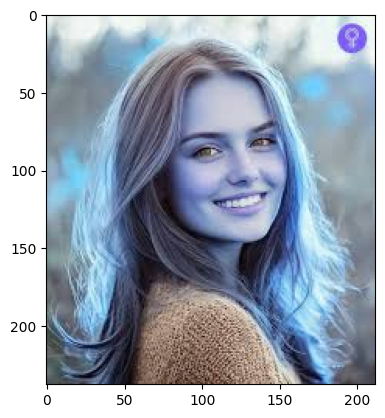

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)

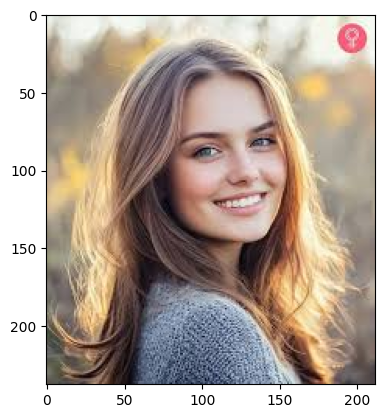

In [6]:
conv_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(conv_img)

In [7]:
face_cas=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cas # creating the object for cascade classifier

< cv2.CascadeClassifier 0000019661236DD0>

In [8]:
faces = face_cas.detectMultiScale(conv_img,minNeighbors=4) # to detect faces
faces # no.of faces = no.of array

array([[75, 46, 97, 97]], dtype=int32)

minneighbours = 4 => if 4 times the part is detected as face then only it will confirm as a face

in many cases the buttons in shirt are detected as face so inorder to avoid that we give this

so if it still detect the unwanted portion as face increase the neighbour count

the first two points are x,y coordinate

but last two points are not

they are the width and height from the first point

array([[75, 46, 97, 97]])

75 -> x, 46 -> y, 97 -> w, 97 -> h

so the bottom right corner can be obtained by

(x+w,y+h) 

fig in notion

In [9]:
for i in faces:
    print(i)

[75 46 97 97]


we need to get x,y,w,h values

In [10]:
for (x,y,w,h) in faces:
    cv2.rectangle(conv_img,(x,y),(x+w,y+h),(0,255,0),4) # img name, top left point, bottom right point, color, thickness

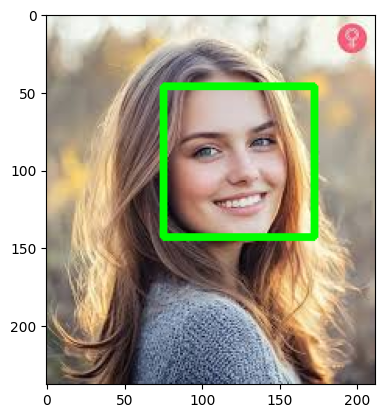

In [11]:
plt.imshow(conv_img)

In [12]:
video=cv2.VideoCapture(0) # to access web cam
while True: # when the web cam is on, available
    suc,img=video.read()
    img=cv2.flip(img,1) # we will be getting mirror image, so to get right img
    img1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # to chane clr
    faces=face_cas.detectMultiScale(img1,minNeighbors=8)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),4)

    cv2.imshow('Video',img)
    if cv2.waitKey(1) & 0XFF == ord('q'): # if we didnt specify this video wont come a image will come. if only we press q then only the window will be closed
        break
video.release() # to close web cam
cv2.destroyAllWindows()

In [13]:
ord('q')

113

In [14]:
video = cv2.VideoCapture('video.mp4') 
while True:
    suc, img = video.read() 

    img = cv2.flip(img,1)  
    if suc == True:
        # Facedetection code:
        img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        faces = face_cas.detectMultiScale(img1,minNeighbors=4)
        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

        cv2.imshow("Video",img)
        if cv2.waitKey(1) & 0XFF==ord('q'):
            break
    else:
        break
video.release() 
cv2.destroyAllWindows()